In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [36]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [37]:
data_dir

'./datasets/flower_photos'

In [38]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [39]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/8223968_6b51555d2f_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8791577794_7573712cb4_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14185089716_2a48298d17.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2674176237_e265ea64cc_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2697283969_c1f9cbb936.jpg')]

In [40]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [41]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1540738662_7b4152e344_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15186434972_e353da940a.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg')]

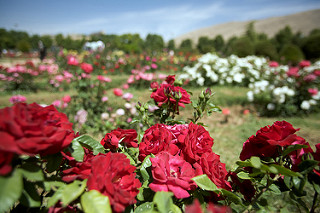

In [42]:
PIL.Image.open(str(roses[1]))

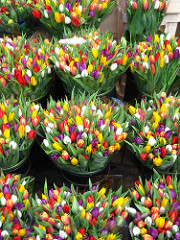

In [43]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [44]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [45]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [46]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/1540738662_7b4152e344_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15186434972_e353da940a.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg')]

In [47]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1540738662_7b4152e344_m.jpg'

In [48]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [49]:
img.shape

(240, 214, 3)

In [50]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [51]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [52]:
X = np.array(X)
y = np.array(y)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [55]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)     

Epoch 1/30
86/86 [==============================] - 3s 24ms/step - loss: 1.3613 - accuracy: 0.4161
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 1.0075 - accuracy: 0.6050
Epoch 3/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8041 - accuracy: 0.6966
Epoch 4/30
86/86 [==============================] - 2s 23ms/step - loss: 0.6135 - accuracy: 0.7754
Epoch 5/30
86/86 [==============================] - 2s 24ms/step - loss: 0.4246 - accuracy: 0.8445
Epoch 6/30
86/86 [==============================] - 2s 24ms/step - loss: 0.2322 - accuracy: 0.9255
Epoch 7/30
86/86 [==============================] - 2s 23ms/step - loss: 0.1222 - accuracy: 0.9611
Epoch 8/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0861 - accuracy: 0.9771
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0476 - accuracy: 0.9880
Epoch 10/30
86/86 [==============================] - 2s 25ms/step - loss: 0.0177 - accuracy: 0.9978
Epoch 11/

In [56]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 15ms/step - loss: 3.2406 - accuracy: 0.6307


[3.240595579147339, 0.6307189464569092]

In [57]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 11ms/step


array([[-13.203069 ,  17.56582  ,   1.1470367,  -4.1338806, -16.333504 ],
       [-10.226445 ,   5.138088 ,   6.459617 ,  -6.013169 ,  -4.415022 ],
       [ -9.98493  ,   1.7975278,  11.0477   , -13.554776 ,  -1.4501281],
       ...,
       [ 17.122192 , -25.76598  , -13.162546 ,   8.742887 ,  13.372023 ],
       [  1.7320024,   7.3960958,  -5.349839 , -10.617198 ,  -2.9489691],
       [  7.50644  , -23.602592 , -17.142744 ,  20.01343  ,  -5.6753583]],
      dtype=float32)

In [58]:
score = tf.nn.softmax(predictions[0])

In [59]:
np.argmax(score)

1

In [60]:
y_test[0]

1

In [63]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180,180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

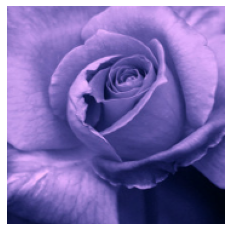

In [64]:
plt.axis('off')
plt.imshow(X[0])

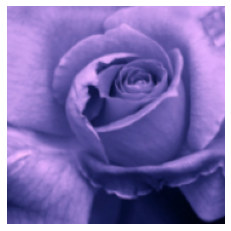

In [65]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [66]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 5s 40ms/step - loss: 1.3463 - accuracy: 0.4426
Epoch 2/30
86/86 [==============================] - 3s 40ms/step - loss: 1.0305 - accuracy: 0.5861
Epoch 3/30
86/86 [==============================] - 3s 40ms/step - loss: 0.9272 - accuracy: 0.6323
Epoch 4/30
86/86 [==============================] - 3s 40ms/step - loss: 0.8598 - accuracy: 0.6617
Epoch 5/30
86/86 [==============================] - 4s 43ms/step - loss: 0.8183 - accuracy: 0.6864
Epoch 6/30
86/86 [==============================] - 3s 40ms/step - loss: 0.7783 - accuracy: 0.7031
Epoch 7/30
86/86 [==============================] - 3s 40ms/step - loss: 0.7060 - accuracy: 0.7340
Epoch 8/30
86/86 [==============================] - 4s 43ms/step - loss: 0.7027 - accuracy: 0.7322
Epoch 9/30
86/86 [==============================] - 3s 40ms/step - loss: 0.6792 - accuracy: 0.7402
Epoch 10/30
86/86 [==============================] - 3s 40ms/step - loss: 0.6335 - accuracy: 0.7616
Epoch 11/

In [67]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 0.9857 - accuracy: 0.7418


[0.9856697916984558, 0.741830050945282]